In [6]:
#load the data
from keras.preprocessing.image import load_img,img_to_array

img_path = './original-images/1.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
type(img)

numpy.ndarray

In [7]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg = VGG16(weights='imagenet',include_top=False)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


In [8]:
features = model_vgg.predict(x)
print(features.shape)

(1, 7, 7, 512)


In [9]:
#flatten
features = features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


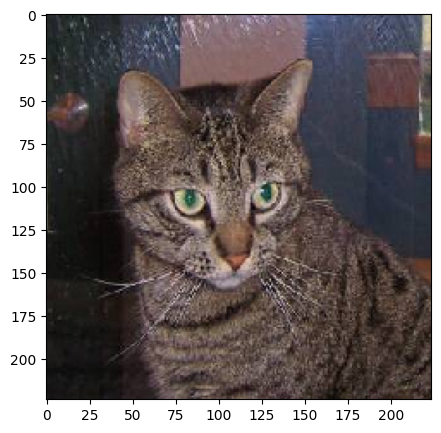

In [10]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5,5))
img = load_img(img_path,target_size=(224,224))
plt.imshow(img)

In [1]:
#load image and preprocess it with vgg16 structure
#--by flare
from keras.preprocessing.image import img_to_array,load_img
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model_vgg = VGG16(weights='imagenet', include_top=False)
#define a method to load and preprocess the image
def modelProcess(img_path,model):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    return x_vgg
#list file names of the training datasets
import os
folder = "dataset/data_vgg/cats"
dirs = os.listdir(folder)
#generate path for the images
img_path = []
for i in dirs:                             
    if os.path.splitext(i)[1] == ".jpg":   
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]

#preprocess multiple images
features1 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features1[i] = feature_i
    
folder = "dataset/data_vgg/dogs"
dirs = os.listdir(folder)
img_path = []
for i in dirs:                             
    if os.path.splitext(i)[1] == ".jpg":   
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]
features2 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features2[i] = feature_i
    
#label the results
print(features1.shape,features2.shape)
y1 = np.zeros(300)
y2 = np.ones(300)

#generate the training data
X = np.concatenate((features1,features2),axis=0)
y = np.concatenate((y1,y2),axis=0)
y = y.reshape(-1,1)
print(X.shape,y.shape)

2023-05-03 10:59:22.332752: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-03 10:59:22.332919: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 10:59:22.699205: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


preprocessed: dataset/data_vgg/cats//cat.6.jpg
preprocessed: dataset/data_vgg/cats//cat.239.jpg
preprocessed: dataset/data_vgg/cats//cat.211.jpg
preprocessed: dataset/data_vgg/cats//cat.205.jpg
preprocessed: dataset/data_vgg/cats//cat.198.jpg
preprocessed: dataset/data_vgg/cats//cat.30.jpg
preprocessed: dataset/data_vgg/cats//cat.24.jpg
preprocessed: dataset/data_vgg/cats//cat.167.jpg
preprocessed: dataset/data_vgg/cats//cat.18.jpg
preprocessed: dataset/data_vgg/cats//cat.173.jpg
preprocessed: dataset/data_vgg/cats//cat.172.jpg
preprocessed: dataset/data_vgg/cats//cat.19.jpg
preprocessed: dataset/data_vgg/cats//cat.166.jpg
preprocessed: dataset/data_vgg/cats//cat.25.jpg
preprocessed: dataset/data_vgg/cats//cat.31.jpg
preprocessed: dataset/data_vgg/cats//cat.199.jpg
preprocessed: dataset/data_vgg/cats//cat.204.jpg
preprocessed: dataset/data_vgg/cats//cat.210.jpg
preprocessed: dataset/data_vgg/cats//cat.238.jpg
preprocessed: dataset/data_vgg/cats//cat.7.jpg
preprocessed: dataset/data_vgg

In [2]:
#split the training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)
print(X_train.shape,X_test.shape,X.shape)

(420, 25088) (180, 25088) (600, 25088)


In [3]:
#set up the mlp model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=25088))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                250890    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [4]:
#configure the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#train the model
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
14/14 [==============================] - 0s 3ms/step - loss: 2.1751 - accuracy: 0.7245
Epoch 2/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.9742
Epoch 3/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9890
Epoch 4/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9987
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 1.0771e-04 - accuracy: 1.0000
Epoch 6/50
14/14 [==============================] - 0s 3ms/step - loss: 6.0667e-05 - accuracy: 1.0000
Epoch 7/50
14/14 [==============================] - 0s 3ms/step - loss: 4.1515e-05 - accuracy: 1.0000
Epoch 8/50
14/14 [==============================] - 0s 4ms/step - loss: 3.8717e-05 - accuracy: 1.0000
Epoch 9/50
14/14 [==============================] - 0s 3ms/step - loss: 3.2245e-05 - accuracy: 1.0000
Epoch 10/50
14/14 [==============================] - 0s 4ms/step - loss: 3.3515e-05 - accuracy: 1.

In [5]:
from sklearn.metrics import accuracy_score
y_train_predict = model.predict_classes(X_train)
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

1.0


/usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [6]:
#测试准确率
y_test_predict = model.predict_classes(X_test)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.9777777777777777


/usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [7]:
img_path = 'cat1.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
features = model_vgg.predict(x)
features = features.reshape(1,7*7*512)
result = model.predict_classes(features)
print(result)

[[0]]


/usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


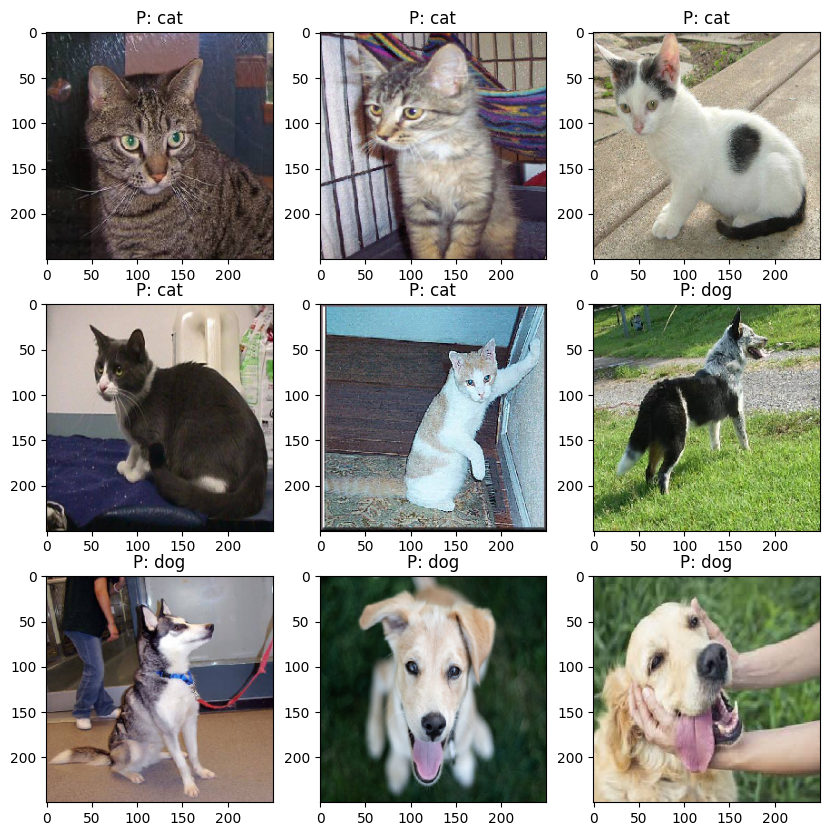

In [10]:
# coding:utf-8
import matplotlib as mlp
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
#from cv2 import load_img
a = [i for i in range(1,10)]
fig = plt.figure(figsize=(10,10))
for i in a:
    img_name = str(i)+'.jpg'
    img_path = img_name
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model_vgg.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    result = model.predict_classes(x_vgg)
    img_ori = load_img(img_name, target_size=(250, 250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('P: dog' if result[0][0] == 1 else 'P: cat')
plt.show()